<a href="https://colab.research.google.com/github/EduardoPalma/ClusteringFood/blob/main/Clustering_de_alimentos_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Informacion nutricional de diversos alimentos, obtenidos de FoodDataCentral, proyecto personal orientado a la realizacion de clustering mediante DBSCAN, para ver similitudes de alimentos.


In [1]:
import zipfile
import json
import pandas as pd

In [3]:
file = "/content/drive/MyDrive/alimentos/FoodData_Central_sr_legacy_food_json_2018-04.zip"

with zipfile.ZipFile(file, 'r') as zip_ref:
    directorio_destino = '/content/drive/MyDrive/alimentos/'
    zip_ref.extractall(directorio_destino)

In [4]:
with open('/content/drive/MyDrive/alimentos/FoodData_Central_sr_legacy_food_json_2021-10-28.json', 'r') as file:
    datos_json = json.load(file)

In [5]:
data_alimentos = datos_json['SRLegacyFoods']
print(len(data_alimentos))

7793


In [6]:
nombres_unicos_nutri = set()

for elemento in data_alimentos:
    lista_nutrientes = elemento['foodNutrients']

    for diccionario in lista_nutrientes:
      nombre = diccionario['nutrient']['name']
      nombres_unicos_nutri.add(nombre)

nombres_nutrientes = list(nombres_unicos_nutri)
print(nombres_nutrientes)

['Fatty acids, total saturated', 'PUFA 20:3 n-6', 'MUFA 24:1 c', 'PUFA 18:2 n-6 c,c', 'SFA 10:0', 'SFA 17:0', 'SFA 4:0', 'Isoleucine', 'Valine', 'PUFA 20:3', 'SFA 18:0', 'Fatty acids, total trans-polyenoic', 'Caffeine', 'Vitamin E (alpha-tocopherol)', 'PUFA 18:3 n-3 c,c,c (ALA)', 'Vitamin B-6', 'Campesterol', 'Vitamin K (Dihydrophylloquinone)', 'Sodium, Na', 'SFA 22:0', 'PUFA 2:5 n-3 (EPA)', 'Thiamin', 'PUFA 18:2 i', 'Galactose', 'SFA 8:0', 'PUFA 22:4', 'Phytosterols', 'Lysine', 'PUFA 20:2 n-6 c,c', 'Vitamin E, added', 'Tocopherol, gamma', 'Folate, total', 'Cystine', 'SFA 15:0', 'Beta-sitosterol', 'Fiber, total dietary', 'Phenylalanine', 'MUFA 20:1', 'Proline', 'TFA 22:1 t', 'Fluoride, F', 'TFA 16:1 t', 'SFA 14:0', 'Riboflavin', 'Selenium, Se', 'Magnesium, Mg', 'SFA 20:0', 'Total lipid (fat)', 'Hydroxyproline', 'Calcium, Ca', 'Alcohol, ethyl', 'Cholesterol', 'Potassium, K', 'Vitamin C, total ascorbic acid', 'PUFA 20:4', 'Sucrose', 'Fatty acids, total polyunsaturated', 'Vitamin B-12, ad

In [7]:
nombres_nutrientes.append("description")
df_alimentos_ = pd.DataFrame(columns=nombres_nutrientes)
print(df_alimentos_)

Empty DataFrame
Columns: [Fatty acids, total saturated, PUFA 20:3 n-6, MUFA 24:1 c, PUFA 18:2 n-6 c,c, SFA 10:0, SFA 17:0, SFA 4:0, Isoleucine, Valine, PUFA 20:3, SFA 18:0, Fatty acids, total trans-polyenoic, Caffeine, Vitamin E (alpha-tocopherol), PUFA 18:3 n-3 c,c,c (ALA), Vitamin B-6, Campesterol, Vitamin K (Dihydrophylloquinone), Sodium, Na, SFA 22:0, PUFA 2:5 n-3 (EPA), Thiamin, PUFA 18:2 i, Galactose, SFA 8:0, PUFA 22:4, Phytosterols, Lysine, PUFA 20:2 n-6 c,c, Vitamin E, added, Tocopherol, gamma, Folate, total, Cystine, SFA 15:0, Beta-sitosterol, Fiber, total dietary, Phenylalanine, MUFA 20:1, Proline, TFA 22:1 t, Fluoride, F, TFA 16:1 t, SFA 14:0, Riboflavin, Selenium, Se, Magnesium, Mg, SFA 20:0, Total lipid (fat), Hydroxyproline, Calcium, Ca, Alcohol, ethyl, Cholesterol, Potassium, K, Vitamin C, total ascorbic acid, PUFA 20:4, Sucrose, Fatty acids, total polyunsaturated, Vitamin B-12, added, Maltose, Tocotrienol, alpha, Fatty acids, total monounsaturated, Lutein + zeaxanthin,

In [8]:
def valores_vacios(df_nuevo):
  for nombre in nombres_nutrientes:
    if nombre not in df_nuevo:
      df_nuevo[nombre] = 0


In [9]:
for elemento in data_alimentos:
  nombre_alimento = elemento['description']
  lista_nutrientes = elemento['foodNutrients']

  df_nuevo = {}
  df_nuevo['description'] = nombre_alimento


  for nutrientes in lista_nutrientes:
      nombre = nutrientes['nutrient']['name']
      cantidad = nutrientes['amount']
      df_nuevo[nombre] = cantidad

  valores_vacios(df_nuevo)
  df_nuevo_concat = pd.DataFrame(df_nuevo, index=[1])
  df_alimentos_ = pd.concat([df_alimentos_, df_nuevo_concat], ignore_index=True)

In [10]:
print(len(df_alimentos_))

7793


In [11]:
df_alimentos = df_alimentos_.drop(columns=['description'])
df_alimentos = df_alimentos.astype(float)
df_alimentos.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793 entries, 0 to 7792
Data columns (total 148 columns):
 #    Column                                    Dtype  
---   ------                                    -----  
 0    Fatty acids, total saturated              float64
 1    PUFA 20:3 n-6                             float64
 2    MUFA 24:1 c                               float64
 3    PUFA 18:2 n-6 c,c                         float64
 4    SFA 10:0                                  float64
 5    SFA 17:0                                  float64
 6    SFA 4:0                                   float64
 7    Isoleucine                                float64
 8    Valine                                    float64
 9    PUFA 20:3                                 float64
 10   SFA 18:0                                  float64
 11   Fatty acids, total trans-polyenoic        float64
 12   Caffeine                                  float64
 13   Vitamin E (alpha-tocopherol)              floa

In [12]:
df_alimentos.head()

,"Fatty acids, total saturated",PUFA 20:3 n-6,MUFA 24:1 c,"PUFA 18:2 n-6 c,c",SFA 10:0,SFA 17:0,SFA 4:0,Isoleucine,Valine,PUFA 20:3,...,Alanine,"Vitamin A, IU",PUFA 21:5,"Tocotrienol, delta",MUFA 14:1,"PUFA 18:3 n-6 c,c,c",Threonine,Vitamin D (D2 + D3),Lycopene,"Cryptoxanthin, beta"
0,2.940,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.000,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
1,3.250,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.000,0.0,...,0.000,1.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
2,0.000,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.000,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
3,0.308,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.000,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
4,1.900,0.0,0.0,0.0,0.0,0.01,0.005,0.281,0.326,0.0,...,0.249,1340.0,0.0,0.0,0.0,0.0,0.225,0.0,0.0,2.0


In [13]:
df_alimentos.describe()

,"Fatty acids, total saturated",PUFA 20:3 n-6,MUFA 24:1 c,"PUFA 18:2 n-6 c,c",SFA 10:0,SFA 17:0,SFA 4:0,Isoleucine,Valine,PUFA 20:3,...,Alanine,"Vitamin A, IU",PUFA 21:5,"Tocotrienol, delta",MUFA 14:1,"PUFA 18:3 n-6 c,c,c",Threonine,Vitamin D (D2 + D3),Lycopene,"Cryptoxanthin, beta"
count,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,...,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000
mean,3.483079,0.001568,0.000669,0.547701,0.045075,0.022159,0.020403,0.439911,0.490168,0.002267,...,0.543895,689.722956,0.000122,0.002306,0.010189,0.001950,0.405540,0.362056,109.844732,7.408315
std,6.647500,0.005839,0.009371,2.718453,0.261131,0.072417,0.141150,0.526344,0.578396,0.008860,...,0.676144,3898.564008,0.005302,0.037768,0.040395,0.019319,0.487568,3.266714,1175.807561,130.785762
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.116000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.470000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.176000,0.214000,0.000000,...,0.169000,20.000000,0.000000,0.000000,0.000000,0.000000,0.143000,0.000000,0.000000,0.000000
75%,4.210000,0.000000,0.000000,0.000000,0.010000,0.008000,0.000000,0.890000,0.980000,0.000000,...,1.130000,190.000000,0.000000,0.000000,0.000000,0.000000,0.833000,0.000000,0.000000,0.000000
max,95.600000,0.102000,0.644000,55.700000,5.600000,1.480000,6.400000,5.020000,6.170000,0.353000,...,8.010000,100000.000000,0.350000,1.460000,1.430000,1.340000,3.680000,250.000000,46300.000000,6250.000000


In [ ]:
alimentos_normalizados = (df_alimentos - df_alimentos.min())/(df_alimentos.max() - df_alimentos.min())
alimentos_normalizados

In [ ]:
alimentos_normalizados.describe()

# Clustering de alimentos, agrupacion por valor nutricional

In [20]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [22]:
db = DBSCAN(eps=0.3, min_samples=10).fit(alimentos_normalizados)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [23]:
print("Numero estimado de clusters: %d" % n_clusters_)
print("Número estimado de puntos de ruido.: %d" % n_noise_)

Numero estimado de clusters: 8
Número estimado de puntos de ruido.: 1220


In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_alimentos = pca.fit_transform(alimentos_normalizados)
df_alimentos_component = pd.DataFrame(data = pca_alimentos, columns=["componente 1","componente 2"])
df_labels = pd.DataFrame(labels, columns=["DBSCAN_labels"])
df_alimentos_labels = pd.concat([df_alimentos_component, df_labels], axis=1)

df_alimentos_labels

,componente 1,componente 2,DBSCAN_labels
0,-0.438416,0.062455,0
1,-0.524922,0.175132,0
2,-0.639137,0.415253,0
3,-0.426160,-0.006072,0
4,-0.274174,0.158325,-1
...,...,...,...
7788,0.691548,0.001846,0
7789,0.566428,-0.106015,0
7790,0.793597,0.058847,0
7791,0.352704,-0.206882,0


In [35]:
data_alimentos = df_alimentos_component.to_numpy()
data_alimentos

array([[-0.43841561,  0.06245549],
       [-0.52492195,  0.17513232],
       [-0.63913737,  0.41525266],
       ...,
       [ 0.79359696,  0.05884691],
       [ 0.35270372, -0.20688195],
       [ 0.50574465, -0.04229203]])

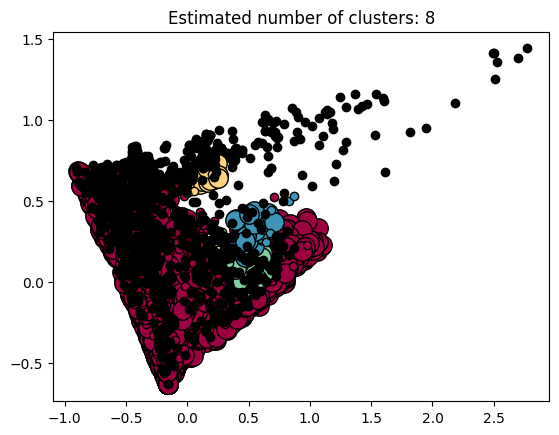

In [36]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = data_alimentos[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = data_alimentos[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

# Visualizacion de los clusters en 3 dimensiones

In [39]:
pca = PCA(n_components=3)
pca_alimentos = pca.fit_transform(alimentos_normalizados)
df_alimentos_component = pd.DataFrame(data = pca_alimentos, columns=["componente 1","componente 2","componente 3"])
df_labels = pd.DataFrame(labels, columns=["DBSCAN_labels"])
df_alimentos_labels = pd.concat([df_alimentos_component, df_labels], axis=1)
df_alimentos_labels

,componente 1,componente 2,componente 3,DBSCAN_labels
0,-0.438416,0.062455,-0.064849,0
1,-0.524922,0.175132,-0.155262,0
2,-0.639137,0.415253,-0.305503,0
3,-0.426160,-0.006072,-0.149893,0
4,-0.274174,0.158325,-0.145567,-1
...,...,...,...,...
7788,0.691548,0.001846,-0.158512,0
7789,0.566428,-0.106015,-0.121080,0
7790,0.793597,0.058847,-0.176499,0
7791,0.352704,-0.206882,-0.056486,0


In [49]:
grupos = set(df_alimentos_labels['DBSCAN_labels'])
grupos

{0, 1, 2, 3, 4, 5, 6, 7}

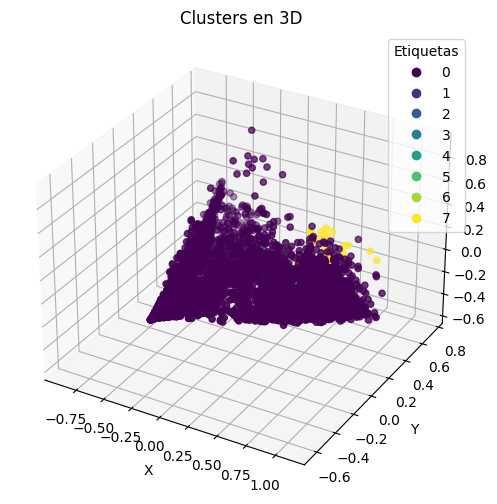

In [48]:
from mpl_toolkits.mplot3d import Axes3D

df_alimentos_labels = df_alimentos_labels[df_alimentos_labels['DBSCAN_labels'] != -1]

x = df_alimentos_labels['componente 1']
y = df_alimentos_labels['componente 2']
z = df_alimentos_labels['componente 3']
labels = df_alimentos_labels['DBSCAN_labels']

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x, y, z, c=labels, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Clusters en 3D')
ax.legend(*scatter.legend_elements(), title='Etiquetas')

# Mostrar el gráfico
plt.show()

In [50]:
import plotly.express as px

fig = px.scatter_3d(df_alimentos_labels, x='componente 1', y='componente 2', z='componente 3',
                    color='DBSCAN_labels', size_max=5, opacity=0.7, labels={'DBSCAN_labels': 'Etiquetas'},
                    color_continuous_scale='deep')

fig.update_layout(scene=dict(
                    xaxis=dict(title='Componente 1'),
                    yaxis=dict(title='Componente 2'),
                    zaxis=dict(title='Componente 3')
                ))

fig.show()